# RQ2: 다이소 뷰티는 저가 소비 시장인가, 듀프 소비 시장인가?

**연구 질문:**
- 다이소는 단순 저가 시장인가, 고가 브랜드 대체재(듀프) 시장인가?
- 소비자는 브랜드를 중요하게 생각하는가, 제품력을 중요하게 생각하는가?

**분석 목표:**
- 고가 브랜드 언급 패턴 분석
- 올리브영 비교 맥락 분석
- 듀프(Dupe) 키워드 분석
- 브랜드 vs 제품력 중요도 분석

**선행 연구:**
- 논문 1: 브랜드 이미지는 만족도에 유의미한 영향 없음
- 논문 4: 소비자는 고가 제품의 대체품(DUPES)으로 인식

---

## 1. 환경 설정

In [1]:
# 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import re
warnings.filterwarnings('ignore')

# 유틸리티 모듈 import
import sys
sys.path.append('./utils')
from text_preprocessing import preprocess_text, tokenize_reviews
from keyword_analysis import (calculate_keyword_frequency, extract_reviews_with_keywords,
                               KEYWORD_CATEGORIES)
from visualization import (create_wordcloud, plot_keyword_frequency, plot_rating_distribution)

In [2]:
# 한글 폰트
import matplotlib
import matplotlib.font_manager as fm
import platform
import os

print("[폰트 설정 시작]")

plt.style.use('seaborn-v0_8-darkgrid')
print("  스타일 적용 완료")

system = platform.system()
print(f"\n시스템: {system}")

if system == 'Darwin':  # macOS
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
    
    if os.path.exists(font_path):
        font_prop = fm.FontProperties(fname=font_path)
        font_name = font_prop.get_name()
        print(f"  폰트 발견: {font_name}")
        
        # 명시적으로 설정
        plt.rcParams['font.family'] = font_name
        plt.rcParams['font.sans-serif'] = [font_name, 'AppleGothic', 'Arial']
    else:
        plt.rcParams['font.family'] = 'AppleGothic'
        plt.rcParams['font.sans-serif'] = ['AppleGothic', 'Apple SD Gothic Neo', 'Arial']


# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print(f"\n[설정 완료]")
print(f"  font.family: {plt.rcParams['font.family']}")
print(f"  font.sans-serif: {plt.rcParams['font.sans-serif']}")

[폰트 설정 시작]
  스타일 적용 완료

시스템: Darwin
  폰트 발견: Apple SD Gothic Neo

[설정 완료]
  font.family: ['Apple SD Gothic Neo']
  font.sans-serif: ['Apple SD Gothic Neo', 'AppleGothic', 'Arial']


## 2. 데이터 로드

In [3]:
# 리뷰 데이터 로드
df_reviews = pd.read_parquet('../data/reviews.parquet')

# 제품 데이터 로드 (브랜드 정보 활용)
df_products = pd.read_parquet('../data/products.parquet')

# 리뷰와 제품 데이터 병합
df_merged = df_reviews.merge(df_products[['product_code', 'brand', 'name', 'category_1']], 
                               on='product_code', how='left')

print(f"[데이터 로드 완료]")
print(f"총 리뷰 수: {len(df_merged):,}개")
print(f"총 제품 수: {len(df_products):,}개")
print(f"브랜드 정보 있는 제품: {df_products['brand'].notna().sum():,}개")

[데이터 로드 완료]
총 리뷰 수: 200,816개
총 제품 수: 961개
브랜드 정보 있는 제품: 961개


## 3. 텍스트 전처리

In [4]:
# 텍스트 토큰화
print("[텍스트 토큰화 시작]")
print("이 작업은 수 분이 소요될 수 있습니다")

df_merged['tokens'] = tokenize_reviews(
    df_merged['text'].tolist(),
    extract_pos=['Noun', 'Adjective'],
    remove_stop=True,
    verbose=True
)

print("\n[완료] 토큰화 완료")

[텍스트 토큰화 시작]
이 작업은 수 분이 소요될 수 있습니다
진행중: 1000/200816 (0.5%)
진행중: 2000/200816 (1.0%)
진행중: 3000/200816 (1.5%)
진행중: 4000/200816 (2.0%)
진행중: 5000/200816 (2.5%)
진행중: 6000/200816 (3.0%)
진행중: 7000/200816 (3.5%)
진행중: 8000/200816 (4.0%)
진행중: 9000/200816 (4.5%)
진행중: 10000/200816 (5.0%)
진행중: 11000/200816 (5.5%)
진행중: 12000/200816 (6.0%)
진행중: 13000/200816 (6.5%)
진행중: 14000/200816 (7.0%)
진행중: 15000/200816 (7.5%)
진행중: 16000/200816 (8.0%)
진행중: 17000/200816 (8.5%)
진행중: 18000/200816 (9.0%)
진행중: 19000/200816 (9.5%)
진행중: 20000/200816 (10.0%)
진행중: 21000/200816 (10.5%)
진행중: 22000/200816 (11.0%)
진행중: 23000/200816 (11.5%)
진행중: 24000/200816 (12.0%)
진행중: 25000/200816 (12.4%)
진행중: 26000/200816 (12.9%)
진행중: 27000/200816 (13.4%)
진행중: 28000/200816 (13.9%)
진행중: 29000/200816 (14.4%)
진행중: 30000/200816 (14.9%)
진행중: 31000/200816 (15.4%)
진행중: 32000/200816 (15.9%)
진행중: 33000/200816 (16.4%)
진행중: 34000/200816 (16.9%)
진행중: 35000/200816 (17.4%)
진행중: 36000/200816 (17.9%)
진행중: 37000/200816 (18.4%)
진행중: 38000/200816 (18.9%)
진행중: 

## 4. 브랜드 언급 패턴 분석

### 4.1 고가 브랜드 분석

In [5]:
# 고가 브랜드 키워드 
luxury_brands = KEYWORD_CATEGORIES['고가브랜드']

print(f"[고가 브랜드 키워드]: {len(luxury_brands)}개")
print(luxury_brands)

[고가 브랜드 키워드]: 30개
['설화수', '라\\s?메르', '랑콤', '에스티\\s?로더|(?<![가-힣])에스티(?![가-힣로])', '시세이도', '크리니크', '클라랑스', '키엘', '디올', '샤넬', '톰\\s?포드', '겔랑', '조\\s?말론', '이솝', '라\\s?프레리', '시슬리', '끌레드뽀\\s?보떼', '헬레나\\s?루빈스타인', '입생\\s?로랑|생로랑|(?<![가-힣])입생(?![가-힣로])|YSL', '지방시', '아르마니\\s?뷰티', '바비\\s?브라운', '딥티크', '바이레도', '메종\\s?마르지엘라', '르\\s?라보', '산타마리아\\s?노벨라', '크리드', '킬리안', '프레데릭\\s?말']


In [6]:
# 고가 브랜드 언급 리뷰 추출
df_luxury_mention = extract_reviews_with_keywords(
    df_merged,
    keywords=luxury_brands,
    text_column='text'
)

print(f"[고가 브랜드 언급 리뷰]")
print(f"총 {len(df_luxury_mention):,}개 ({len(df_luxury_mention)/len(df_merged)*100:.2f}%)")
print(f"평균 평점: {df_luxury_mention['rating'].mean():.2f}")

[고가 브랜드 언급 리뷰]
총 43개 (0.02%)
평균 평점: 4.84


In [7]:
# 언급된 고가 브랜드 빈도 분석
brand_mentions = {}
for pattern in luxury_brands:
    # 정규표현식 패턴으로 매칭
    count = df_merged['text'].apply(lambda x: bool(re.search(pattern, str(x)))).sum()
    if count > 0:
        brand_mentions[pattern] = count

# 빈도순 정렬
sorted_brands = sorted(brand_mentions.items(), key=lambda x: x[1], reverse=True)

print("\n[고가 브랜드 언급 빈도 Top 10]")
for i, (brand, count) in enumerate(sorted_brands[:10], 1):
    print(f"{i}. {brand}: {count:,}회")

# DataFrame 생성 (시각화용)
df_brand_freq = pd.DataFrame(sorted_brands, columns=['brand', 'frequency'])
print(f"\n총 {len(df_brand_freq)}개 브랜드 패턴이 언급됨")


[고가 브랜드 언급 빈도 Top 10]
1. 샤넬: 17회
2. 키엘: 7회
3. 설화수: 4회
4. 입생\s?로랑|생로랑|(?<![가-힣])입생(?![가-힣로])|YSL: 4회
5. 디올: 2회
6. 바비\s?브라운: 2회
7. 바이레도: 2회
8. 에스티\s?로더|(?<![가-힣])에스티(?![가-힣로]): 1회
9. 조\s?말론: 1회
10. 이솝: 1회

총 13개 브랜드 패턴이 언급됨


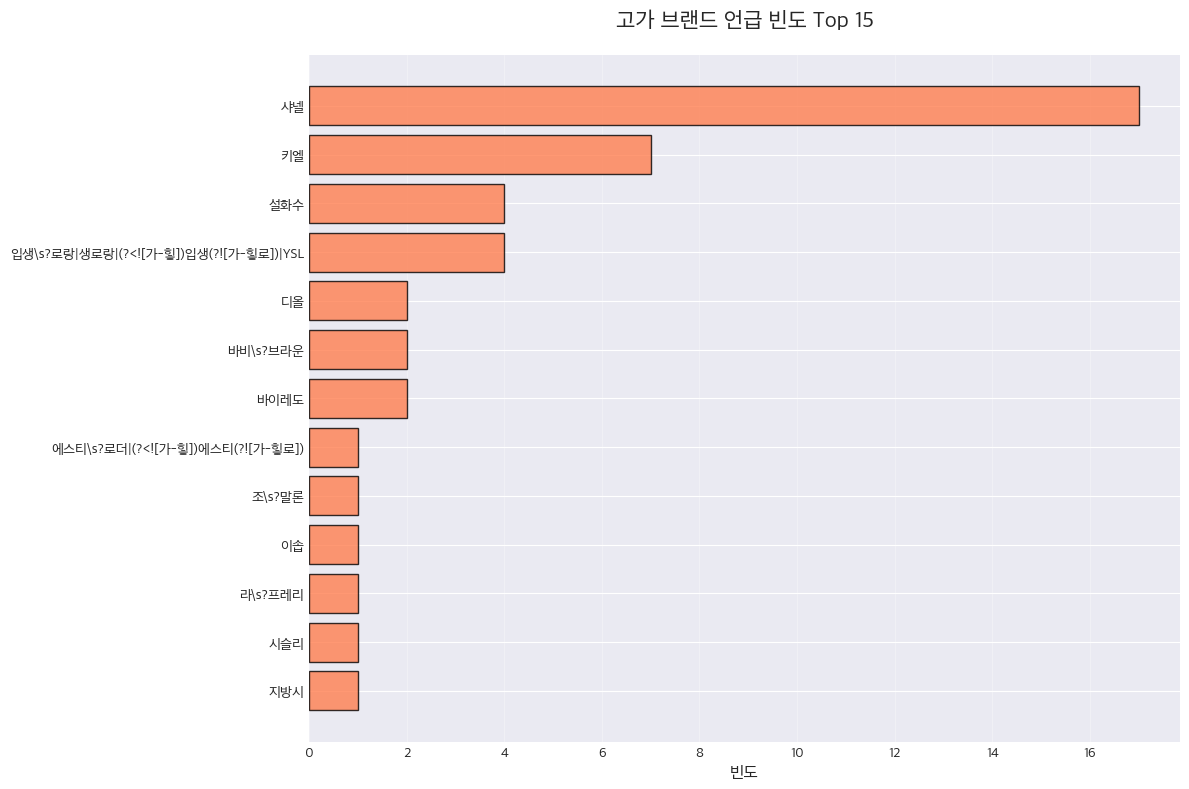

In [8]:
# 시각화: 고가 브랜드 언급 빈도
if len(df_brand_freq) > 0:
    plot_keyword_frequency(
        df_brand_freq.head(15),
        keyword_col='brand',
        freq_col='frequency',
        title='고가 브랜드 언급 빈도 Top 15',
        color='coral',
        top_n=15
    )
else:
    print("고가 브랜드 언급이 없습니다.")

In [9]:
# 고가 브랜드 언급 리뷰에서 실제 매칭된 패턴 확인
print("고가 브랜드 패턴 매칭 확인]")
print("=" * 80)

for idx, row in df_luxury_mention.head(10).iterrows():
    text = str(row['text'])
    print(f"\n[리뷰 {idx}] 평점 {row['rating']}점")
    print(f"텍스트: {text[:100]}")
    
    # 어떤 패턴이 매칭되었는지 확인
    matched_patterns = []
    for pattern in luxury_brands:
        matches = re.findall(pattern, text)
        if matches:
            matched_patterns.append((pattern, matches))
    
    if matched_patterns:
        print(f"매칭된 패턴:")
        for pattern, matches in matched_patterns:
            print(f"  - '{pattern}' → {matches}")
    else:
        print("매칭된 패턴 없음")
    print("-" * 80)

고가 브랜드 패턴 매칭 확인]

[리뷰 1992] 평점 5점
텍스트: 재구매 하도 요새 얘기가 많아서 궁금했는데
알람도 안오고 계속 품절이기에 포기했는데 진짜 운좋게 샀네요.
한 품목당 1인 2개 제한에 한번 품절되면 한동안 안들어오길래 그냥 100
매칭된 패턴:
  - '키엘' → ['키엘']
--------------------------------------------------------------------------------

[리뷰 2031] 평점 5점
텍스트: 재구매 하도 요새 얘기가 많아서 궁금했는데
알람도 안오고 계속 품절이기에 포기했는데 진짜 운좋게 샀네요.
한 품목당 1인 2개 제한에 한번 품절되면 한동안 안들어오길래 그냥 100
매칭된 패턴:
  - '키엘' → ['키엘']
--------------------------------------------------------------------------------

[리뷰 2529] 평점 5점
텍스트: 민감성 여드름 피부 수부지인데 제로이드MD 이지듀 에스트라 피지오겔 키엘보다 훨씬 좋아요👍
매칭된 패턴:
  - '키엘' → ['키엘']
--------------------------------------------------------------------------------

[리뷰 8560] 평점 5점
텍스트: 재구매 쟁여놓으려고요 입생로랑 쿠션이랑도 잘 맞네요
매칭된 패턴:
  - '입생\s?로랑|생로랑|(?<![가-힣])입생(?![가-힣로])|YSL' → ['입생로랑']
--------------------------------------------------------------------------------

[리뷰 12166] 평점 5점
텍스트: (2일 쓴 후기 추가) 이거 덕분인가 선크림 쓰고 트러블 올라온거 쏙 들어갔어요;; 대박

(키엘 토너 - vt 시카카밍 에센스(다이소) - 히알루론산 슬리핑 마스크 (파란색 짜서
매칭된 패턴:
  - '키엘' → ['키엘

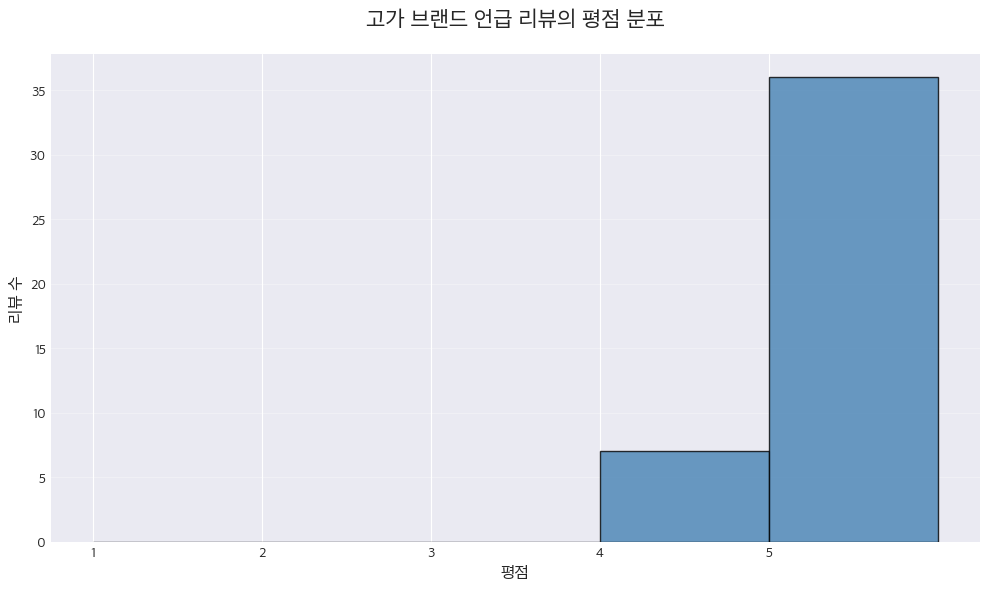

In [10]:
# 고가 브랜드 언급 시 평점 분포
if len(df_luxury_mention) > 0:
    plot_rating_distribution(
        df_luxury_mention,
        rating_col='rating',
        title='고가 브랜드 언급 리뷰의 평점 분포'
    )
else:
    print("고가 브랜드 언급이 없어 시각화를 생략합니다.")

### 4.2 로드샵 브랜드 언급 분석

In [11]:
# 로드샵 브랜드 키워드 
roadshop_brands = KEYWORD_CATEGORIES['로드샵브랜드']

print(f"[로드샵 브랜드 키워드]: {len(roadshop_brands)}개")
print(roadshop_brands)

[로드샵 브랜드 키워드]: 50개
['올리브영', '올영', '무신사\\s?뷰티', '컬리\\s?뷰티', '클리오', '롬앤', '페리페라', '이니스프리', '에뛰드', '미샤', '시코르', '세포라', '로드샵', '백화점', '면세점', '카카오\\s?선물', '홈쇼핑', '공홈', '직구', '해외\\s?직구', '닥터지', '달바', '맥', 'MAC', '나스', '헤라', '어퓨', "A\\'pieu", '토니모리', '홀리카', '더페이스샵', '스킨푸드', '라네즈', '아이오페', '에이프릴스킨', '라운드랩', '코스알엑스', '비디비치', '토르', '독도', '더마토리', '피지오겔', '닥터[^\\s]{0,2}(?:[가-힣]|$)', '아누아', '바이오더마', '토리든', '3ce', '제로이드', '이지듀', '에스트라']


In [12]:
# 로드샵 브랜드 언급 리뷰 추출
df_roadshop_brand = extract_reviews_with_keywords(
    df_merged,
    keywords=roadshop_brands,
    text_column='text'
)

print(f"\n[로드샵 브랜드 언급 리뷰]")
print(f"전체 리뷰: {len(df_merged):,}개")
print(f"로드샵 브랜드 언급: {len(df_roadshop_brand):,}개 ({len(df_roadshop_brand)/len(df_merged)*100:.1f}%)")


[로드샵 브랜드 언급 리뷰]
전체 리뷰: 200,816개
로드샵 브랜드 언급: 1,443개 (0.7%)


In [13]:
# 로드샵 브랜드 키워드 빈도 분석
roadshop_brand_mentions = {}
for pattern in roadshop_brands:
    count = df_merged['text'].apply(lambda x: bool(re.search(pattern, str(x)))).sum()
    if count > 0:
        roadshop_brand_mentions[pattern] = count

# 빈도순 정렬
sorted_roadshop = sorted(roadshop_brand_mentions.items(), key=lambda x: x[1], reverse=True)

print("\n[로드샵 브랜드 키워드 빈도 Top 10]")
for i, (keyword, count) in enumerate(sorted_roadshop[:10], 1):
    print(f"{i}. {keyword}: {count:,}회")

# DataFrame 생성 (추후 분석용)
df_roadshop_brand_freq = pd.DataFrame(sorted_roadshop, columns=['keyword', 'frequency'])
print(f"\n총 {len(df_roadshop_brand_freq)}개 브랜드가 언급됨")


[로드샵 브랜드 키워드 빈도 Top 10]
1. 올영: 465회
2. 올리브영: 265회
3. 닥터[^\s]{0,2}(?:[가-힣]|$): 150회
4. 어퓨: 133회
5. 토니모리: 71회
6. 에뛰드: 41회
7. 닥터지: 40회
8. 달바: 34회
9. 공홈: 32회
10. 백화점: 31회

총 37개 브랜드가 언급됨


In [14]:
# 로드샵 브랜드 언급 리뷰 샘플
print("[로드샵 브랜드 언급 리뷰 샘플]")
for idx, row in df_roadshop_brand.head(10).iterrows():
    print(f"{idx+1}. (평점 {row['rating']}점) {row['text'][:100]}")

[로드샵 브랜드 언급 리뷰 샘플]
112. (평점 5점) 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~
113. (평점 5점) 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~
115. (평점 5점) 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~
580. (평점 5점) 어퓨라 구매 해 보았습니다. 생각보다 괜찮네요. 재구매 의사 있음.
662. (평점 5점) 좋아여! 어퓨제품이라 잘맞는거같어여
878. (평점 5점) 드디어 샀습니다.
워낙 인기가 많아 구매가 힘들어서.
올영에서 구매해서 써보고..
좋아서 구매했어요.
898. (평점 5점) 올영에서는 리들샷 100만 팔길래..
궁금해서 300과 100 같이 구매했어요.
다만 1인당 1개씩만 구매 가능해서..ㅠ
확실히 다음날 세수할때 달라요..
991. (평점 4점) 재구매 올리브영에서 먼저 구입해서 사용해보다 저렴해서 구입했어요.자극은 심한편은 아니구요.사용후 보들보들좋아요
1647. (평점 5점) 재구매 우연히 선물받아서 사용한뒤로 오프라인매장을 열심히 발품팔아 다녀봤지만 구할수 없었어요.. 그냥 포기하고 올리브영가서 사야겠다 하고 있었는데 우연히 구매단추가 생성되길래 결재
1779. (평점 4점) 생각보다 많이 순해요! 올영에서 100짜리 구매해서 쓰는 중인데 그거랑 비교하면 거의 비슷하거나 1.3배 수준으로 따끔거리는 것 같아요. 그리고 좀 더 점성이 있고 촉촉한 편인것 


In [15]:
# 로드샵 브랜드 언급 리뷰에서 실제 매칭된 패턴 확인
print("[로드샵 브랜드 패턴 매칭 확인]")
print("=" * 80)

for idx, row in df_roadshop_brand.head(10).iterrows():
    text = str(row['text'])
    print(f"\n평점 {row['rating']}점: {text[:100]}")
    
    # 어떤 패턴이 매칭되었는지 확인
    matched_patterns = []
    for pattern in roadshop_brands:
        if re.search(pattern, text):
            matched_patterns.append(pattern)
    
    if matched_patterns:
        print(f"→ 매칭된 브랜드: {', '.join(matched_patterns)}")
    else:
        print("→ 매칭된 패턴 없음")
    print("-" * 80)

[로드샵 브랜드 패턴 매칭 확인]

평점 5점: 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~
→ 매칭된 브랜드: 올영, 어퓨
--------------------------------------------------------------------------------

평점 5점: 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~
→ 매칭된 브랜드: 올영, 어퓨
--------------------------------------------------------------------------------

평점 5점: 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~
→ 매칭된 브랜드: 올영, 어퓨
--------------------------------------------------------------------------------

평점 5점: 어퓨라 구매 해 보았습니다. 생각보다 괜찮네요. 재구매 의사 있음.
→ 매칭된 브랜드: 어퓨
--------------------------------------------------------------------------------

평점 5점: 좋아여! 어퓨제품이라 잘맞는거같어여
→ 매칭된 브랜드: 어퓨
--------------------------------------------------------------------------------

평점 5점: 드디어 샀습니다.
워낙 인기가 많아 구매가 힘들어서.
올영에서 구매해서 써보고..
좋아서 구매했어요.
→ 매칭된 브랜드: 올영
-----------------------------------------------------------

### 4.3 고가 브랜드 vs 로드샵 브랜드 비교

In [16]:
# 브랜드 유형별 기본 통계
comparison_data = {
    '브랜드 유형': ['고가 브랜드', '로드샵 브랜드'],
    '언급 리뷰 수': [len(df_luxury_mention), len(df_roadshop_brand)],
    '전체 대비 비율(%)': [
        len(df_luxury_mention)/len(df_merged)*100,
        len(df_roadshop_brand)/len(df_merged)*100
    ],
    '평균 평점': [
        df_luxury_mention['rating'].mean() if len(df_luxury_mention) > 0 else 0,
        df_roadshop_brand['rating'].mean() if len(df_roadshop_brand) > 0 else 0
    ]
}

df_brand_comparison = pd.DataFrame(comparison_data)
print("\n[브랜드 유형별 비교]")
print(df_brand_comparison.to_string(index=False))


[브랜드 유형별 비교]
 브랜드 유형  언급 리뷰 수  전체 대비 비율(%)    평균 평점
 고가 브랜드       43     0.021413 4.837209
로드샵 브랜드     1443     0.718568 4.815662


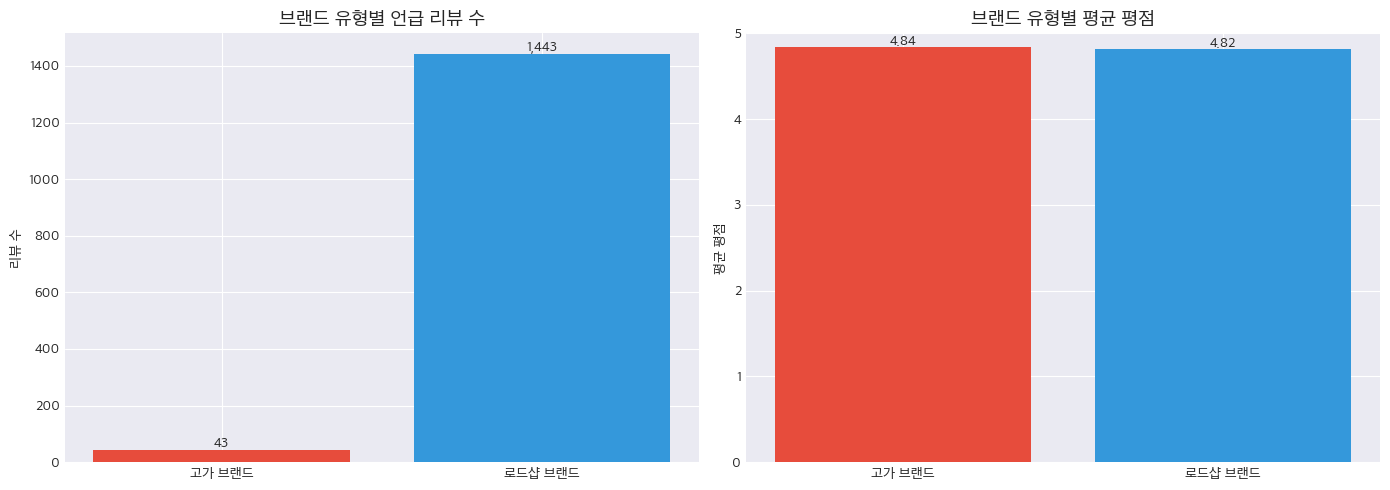

In [17]:
# 시각화: 브랜드 유형별 언급 비율
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 좌: 언급 리뷰 수
axes[0].bar(df_brand_comparison['브랜드 유형'], df_brand_comparison['언급 리뷰 수'], 
            color=['#e74c3c', '#3498db'])
axes[0].set_title('브랜드 유형별 언급 리뷰 수', fontsize=14, fontweight='bold')
axes[0].set_ylabel('리뷰 수')
for i, v in enumerate(df_brand_comparison['언급 리뷰 수']):
    axes[0].text(i, v, f'{int(v):,}', ha='center', va='bottom')

# 우: 평균 평점
axes[1].bar(df_brand_comparison['브랜드 유형'], df_brand_comparison['평균 평점'],
            color=['#e74c3c', '#3498db'])
axes[1].set_title('브랜드 유형별 평균 평점', fontsize=14, fontweight='bold')
axes[1].set_ylabel('평균 평점')
axes[1].set_ylim([0, 5])
for i, v in enumerate(df_brand_comparison['평균 평점']):
    axes[1].text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

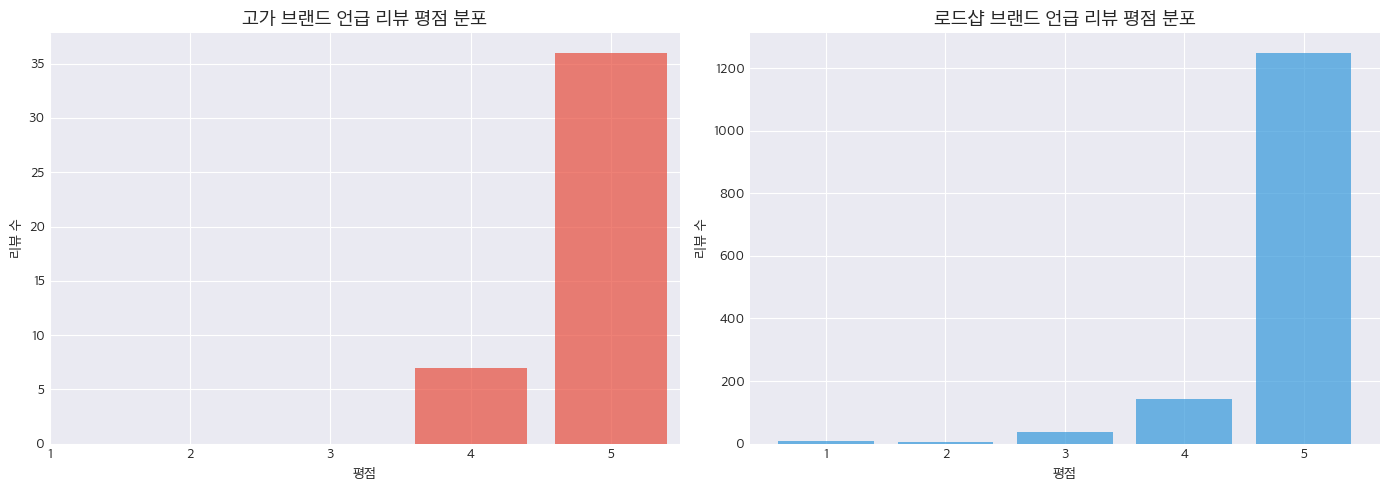

In [18]:
# 평점 분포 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 고가 브랜드 평점 분포
if len(df_luxury_mention) > 0:
    rating_counts_luxury = df_luxury_mention['rating'].value_counts().sort_index()
    axes[0].bar(rating_counts_luxury.index, rating_counts_luxury.values, color='#e74c3c', alpha=0.7)
    axes[0].set_title('고가 브랜드 언급 리뷰 평점 분포', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('평점')
    axes[0].set_ylabel('리뷰 수')
    axes[0].set_xticks([1, 2, 3, 4, 5])

# 로드샵 브랜드 평점 분포
if len(df_roadshop_brand) > 0:
    rating_counts_roadshop = df_roadshop_brand['rating'].value_counts().sort_index()
    axes[1].bar(rating_counts_roadshop.index, rating_counts_roadshop.values, color='#3498db', alpha=0.7)
    axes[1].set_title('로드샵 브랜드 언급 리뷰 평점 분포', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('평점')
    axes[1].set_ylabel('리뷰 수')
    axes[1].set_xticks([1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()

In [19]:
# 브랜드 유형별 인사이트
print("\n=== 브랜드 유형별 분석 인사이트 ===")
print(f"\n1. 고가 브랜드 언급")
print(f"   - 전체의 {len(df_luxury_mention)/len(df_merged)*100:.1f}%가 고가 브랜드 언급")
print(f"   - 평균 평점: {df_luxury_mention['rating'].mean():.2f}점")
print(f"   - 고평점(4-5점) 비율: {(df_luxury_mention['rating'] >= 4).mean()*100:.1f}%")

print(f"\n2. 로드샵 브랜드 언급")
print(f"   - 전체의 {len(df_roadshop_brand)/len(df_merged)*100:.1f}%가 로드샵 브랜드 언급")
print(f"   - 평균 평점: {df_roadshop_brand['rating'].mean():.2f}점")
print(f"   - 고평점(4-5점) 비율: {(df_roadshop_brand['rating'] >= 4).mean()*100:.1f}%")

print(f"\n3. 비교 분석")
luxury_ratio = len(df_luxury_mention)/len(df_merged)*100
roadshop_ratio = len(df_roadshop_brand)/len(df_merged)*100

if luxury_ratio > roadshop_ratio:
    print(f"   - 고가 브랜드 언급이 로드샵 브랜드보다 {luxury_ratio/roadshop_ratio:.1f}배 많음")
    print(f"   - 듀프/대체재 의식이 강한 시장")
else:
    print(f"   - 로드샵 브랜드 언급이 고가 브랜드보다 {roadshop_ratio/luxury_ratio:.1f}배 많음")
    print(f"   - 로드샵 경쟁 제품으로 인식")


=== 브랜드 유형별 분석 인사이트 ===

1. 고가 브랜드 언급
   - 전체의 0.0%가 고가 브랜드 언급
   - 평균 평점: 4.84점
   - 고평점(4-5점) 비율: 100.0%

2. 로드샵 브랜드 언급
   - 전체의 0.7%가 로드샵 브랜드 언급
   - 평균 평점: 4.82점
   - 고평점(4-5점) 비율: 96.5%

3. 비교 분석
   - 로드샵 브랜드 언급이 고가 브랜드보다 33.6배 많음
   - 로드샵 경쟁 제품으로 인식


## 5. 올리브영 언급 분석

In [20]:
# 올리브영 키워드
oliveyoung_keywords = ['올영', '올리브영', '올리브', '올영템']

# 올리브영 언급 리뷰 추출
df_oy_mention = extract_reviews_with_keywords(
    df_merged,
    keywords=oliveyoung_keywords,
    text_column='text'
)

print(f"[올리브영 언급 리뷰]")
print(f"총 {len(df_oy_mention):,}개 ({len(df_oy_mention)/len(df_merged)*100:.2f}%)")
print(f"평균 평점: {df_oy_mention['rating'].mean():.2f}")

[올리브영 언급 리뷰]
총 749개 (0.37%)
평균 평점: 4.83


In [21]:
# 올리브영 비교 맥락 분석
comparison_patterns = {
    '올영보다': '경쟁',
    '올영 대신': '대체',
    '올영에서': '비교구매',
    '올영에 비해': '가격비교',
    '올영꺼': '동일제품'
}

context_counts = {}
for pattern, context in comparison_patterns.items():
    count = df_oy_mention['text'].str.contains(pattern, case=False, na=False).sum()
    context_counts[context] = count

print("[올리브영 비교 맥락]")
for context, count in context_counts.items():
    print(f"{context}: {count}건")

[올리브영 비교 맥락]
경쟁: 47건
대체: 0건
비교구매: 164건
가격비교: 0건
동일제품: 21건


In [22]:
# 올리브영 언급 리뷰 샘플
print("[올리브영 언급 리뷰 샘플]")
for idx, row in df_oy_mention.head(10).iterrows():
    print(f"\n평점 {row['rating']}점: {row['text'][:150]}")

[올리브영 언급 리뷰 샘플]

평점 5점: 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~

평점 5점: 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~

평점 5점: 어퓨 티트리 라인 저렴하고 제품퀄도 넘 좋아요!!&& 매번 올영 세일기간 맞추고 가격 비교하기도 귀찮은데 다이소 화장품 라인이 더더 늘었으면 좋겠네요~~

평점 5점: 드디어 샀습니다.
워낙 인기가 많아 구매가 힘들어서.
올영에서 구매해서 써보고..
좋아서 구매했어요.

평점 5점: 올영에서는 리들샷 100만 팔길래..
궁금해서 300과 100 같이 구매했어요.
다만 1인당 1개씩만 구매 가능해서..ㅠ
확실히 다음날 세수할때 달라요..

평점 4점: 재구매 올리브영에서 먼저 구입해서 사용해보다 저렴해서 구입했어요.자극은 심한편은 아니구요.사용후 보들보들좋아요

평점 5점: 재구매 우연히 선물받아서 사용한뒤로 오프라인매장을 열심히 발품팔아 다녀봤지만 구할수 없었어요.. 그냥 포기하고 올리브영가서 사야겠다 하고 있었는데 우연히 구매단추가 생성되길래 결재까지 하고 중간에 품절뜨면 어쩌지 어쩌지 했는데 오잉!!!! 배송중이란 단어에 어찌나 기쁘

평점 4점: 생각보다 많이 순해요! 올영에서 100짜리 구매해서 쓰는 중인데 그거랑 비교하면 거의 비슷하거나 1.3배 수준으로 따끔거리는 것 같아요. 그리고 좀 더 점성이 있고 촉촉한 편인것 같아요. 그래도 재입고 되어서 체험해볼 목적으로 사본건데 좋습니다 저는 이 다음 단계 올영

평점 5점: 재구매 계속 사용하고 싶은 제품입니다.. 구매가 힘들어서 이번에는 올영에서 본품도 샀어요.

평점 5점: 재구매 제품 괜찮은데 구매하기가 어려워서 결국 올영에서 본품 샀어요. 세일하니까 크게 부담스러운 가격은 아니네여


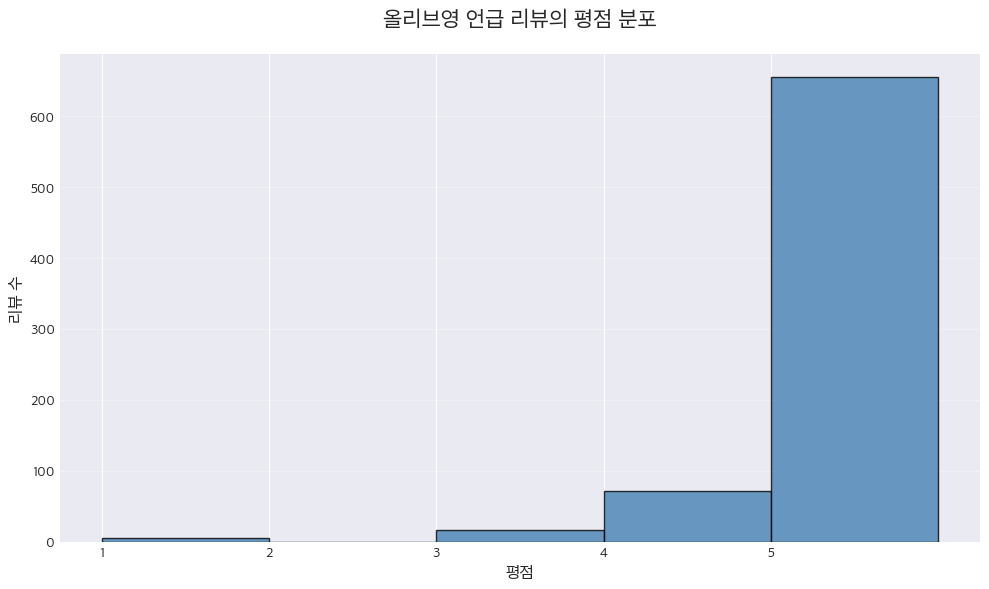

In [23]:
# 시각화: 올리브영 언급 시 평점 분포
if len(df_oy_mention) > 0:
    plot_rating_distribution(
        df_oy_mention,
        rating_col='rating',
        title='올리브영 언급 리뷰의 평점 분포'
    )
else:
    print("올리브영 언급이 없어 시각화를 생략합니다.")

## 6. 듀프(Dupe) 키워드 분석

In [24]:
# 듀프 관련 키워드
dupe_keywords = KEYWORD_CATEGORIES['듀프']
print(f"[듀프 키워드]: {dupe_keywords}")

[듀프 키워드]: ['듀프', '대체재', '비슷[하한해]', '똑같[다아]', '흡사', '닮[았다아]', '유사[하한]', '차이[가]?\\s?없', '저렴이', '비싼\\s?거\\s?필요\\s?없|비싼\\s?제품\\s?필요\\s?없', '가성비템', '짭', '카피', '[가-힣]+\\s?대신\\s?[써쓰사용]', '비교[했하면]\\s?[때도]', '[비슷똑]\\s?같[은다]']


In [25]:
# 듀프 언급 리뷰 추출
df_dupe_mention = extract_reviews_with_keywords(
    df_merged,
    keywords=dupe_keywords,
    text_column='text'
)

print(f"[듀프 언급 리뷰]")
print(f"총 {len(df_dupe_mention):,}개 ({len(df_dupe_mention)/len(df_merged)*100:.2f}%)")
print(f"평균 평점: {df_dupe_mention['rating'].mean():.2f}")

[듀프 언급 리뷰]
총 1,356개 (0.68%)
평균 평점: 4.72


In [26]:
import re

# 듀프 키워드 언급 리뷰에서 실제 매칭된 패턴 확인
print("[듀프 키워드 패턴 매칭 확인]")
print("=" * 80)

for idx, row in df_dupe_mention.head(10).iterrows():
    text = str(row['text'])
    print(f"\n평점 {row['rating']}점: {text[:100]}")
    
    # 어떤 패턴이 매칭되었는지 확인
    matched_patterns = []
    for pattern in dupe_keywords:
        if re.search(pattern, text):
            matched_patterns.append(pattern)
    
    if matched_patterns:
        print(f"→ 매칭된 패턴: {', '.join(matched_patterns)}")
    else:
        print("→ 매칭된 패턴 없음")
    print("-" * 80)

[듀프 키워드 패턴 매칭 확인]

평점 5점: 가성비템 ㅎㅎ 좋아요
→ 매칭된 패턴: 가성비템
--------------------------------------------------------------------------------

평점 5점: 이거.. 롬×의 베어 포도 색이랑 비슷해요 ㅋㅋㅋㅋ 향도 달달하고 색 이쁘고 지속력 좋습니다. 탕후루 립까진 아니더라도 광택 충분히 이쁘게 나요 강추!!!
→ 매칭된 패턴: 비슷[하한해]
--------------------------------------------------------------------------------

평점 5점: 모자르면 항상 채워두는 다이소 면봉이에요~ 저렴하지만 절대 부실하지 않고요 마트표랑 똑같은데 소모품 비싼 거 쓸 필요가 없네요
→ 매칭된 패턴: [비슷똑]\s?같[은다]
--------------------------------------------------------------------------------

평점 5점: 재구매 풀색 쫀득한 제형이라 바르면 바로 수분 충전되는 느낌~
약간 쑥향 비슷한 향이 납니다~
→ 매칭된 패턴: 비슷[하한해]
--------------------------------------------------------------------------------

평점 5점: 다이소 유명제품이라 구매했어요 ㅎㅎ 비싼 토너랑 큰 차이 없는거 같아요~
→ 매칭된 패턴: 차이[가]?\s?없
--------------------------------------------------------------------------------

평점 5점: 가성비템 인정합니다 수부지인데 겨울이라 요거랑 결앰플같이쓰면 속건조함도없고 근데처음쓸때 뚜껑이안열려서 당황했어요
→ 매칭된 패턴: 가성비템
--------------------------------------------------------------------------------

평점 5점: 가성

In [27]:
# 듀프로 언급되는 제품 Top 10
if len(df_dupe_mention) > 0:
    dupe_products = df_dupe_mention.groupby('name').agg({
        'product_code': 'count',
        'rating': 'mean'
    }).rename(columns={'product_code': 'review_count'})
    dupe_products = dupe_products.sort_values('review_count', ascending=False)
    
    print("[듀프로 언급되는 제품 Top 10]")
    print(dupe_products.head(10))
else:
    print("듀프 언급이 없습니다.")

[듀프로 언급되는 제품 Top 10]
                                   review_count    rating
name                                                     
손앤박 아티 스프레드 컬러 밤(03 멜로우)                     40  4.675000
VT 리들샷 100 페이셜 부스팅 퍼스트 앰플 2ml*6개입            36  4.833333
본셉 비타씨 동결 건조 더블샷 앰플 키트                       25  4.840000
입큰 퍼스널 톤 코렉팅 블러 팩트 5.5 g(라벤더)                25  4.880000
클라뷰 밸런싱 포어밤 프라이머 10 ml                       18  4.777778
드롭비 컬러즈 커버픽 컨실러 클리어 베이지                      18  4.833333
본셉 레티놀 2500 IU 링클샷 퍼펙터 15 ml                 18  4.722222
마데카21 테카 솔루션 수딩 미스트 토너 200 ml                17  4.823529
마데카21 테카 솔루션 수딩 크림 50 ml                     17  4.764706
더봄 애교살＆트임 펜슬(볼륨베이지)                          14  4.428571


In [28]:
# 듀프 언급 리뷰 샘플
print("[듀프 언급 리뷰 샘플]")
for idx, row in df_dupe_mention.head(10).iterrows():
    product_name = str(row['name']) if pd.notna(row['name']) else '제품명 없음'
    print(f"\n제품: {product_name[:30]}")
    print(f"평점 {row['rating']}점: {row['text'][:150]}")

[듀프 언급 리뷰 샘플]

제품: 제품명 없음
평점 5점: 가성비템 ㅎㅎ 좋아요

제품: 트윙클팝 퓨어 글래스 틴트(02 쿨모브) by CLIO
평점 5점: 이거.. 롬×의 베어 포도 색이랑 비슷해요 ㅋㅋㅋㅋ 향도 달달하고 색 이쁘고 지속력 좋습니다. 탕후루 립까진 아니더라도 광택 충분히 이쁘게 나요 강추!!!

제품: 제품명 없음
평점 5점: 모자르면 항상 채워두는 다이소 면봉이에요~ 저렴하지만 절대 부실하지 않고요 마트표랑 똑같은데 소모품 비싼 거 쓸 필요가 없네요

제품: 제품명 없음
평점 5점: 재구매 풀색 쫀득한 제형이라 바르면 바로 수분 충전되는 느낌~
약간 쑥향 비슷한 향이 납니다~

제품: 제품명 없음
평점 5점: 다이소 유명제품이라 구매했어요 ㅎㅎ 비싼 토너랑 큰 차이 없는거 같아요~

제품: 제품명 없음
평점 5점: 가성비템 인정합니다 수부지인데 겨울이라 요거랑 결앰플같이쓰면 속건조함도없고 근데처음쓸때 뚜껑이안열려서 당황했어요

제품: 제품명 없음
평점 5점: 가성비템입니다 처음에 안열려서 울뻔했지만 제품은좋아요

제품: 드롭비 컬러즈 커버픽 컨실러 클리어 베이지
평점 4점: 더샘거랑 비슷하게 생겨서 사봤어요 이런 리퀴드 타입이 건조하지 않게 촉촉하게 컨투어 할 수 있어 좋아요 개인적으로는 양도 이게 조절하기 좋은 듯해여 크림타입보단

제품: VT 리들샷 100 페이셜 부스팅 퍼스트 앰플 2ml*
평점 5점: 재구매 올xx영에서 구매해서 리들샷 자주 사용하는데
성분 다똑같아서 다이소에서 한번 구매하고 오프라인에는 없더라구요 ㅠㅠ 다행히 온라인으로 구매했어요
100보다는 300이 제일 좋아요!!

제품: 입큰 퍼스널 톤 코렉팅 블러 팩트 5.5 g(라벤더)
평점 5점: 유튜브에서 유명해서 사봤는데 나름 시중에 파는 제품과 비슷해서 좋아요


[듀프 언급 vs 일반 리뷰 비교]
      그룹     평균 평점    리뷰 수
0  듀프 언급  4.717552    1356
1     일반  4.780643  199460


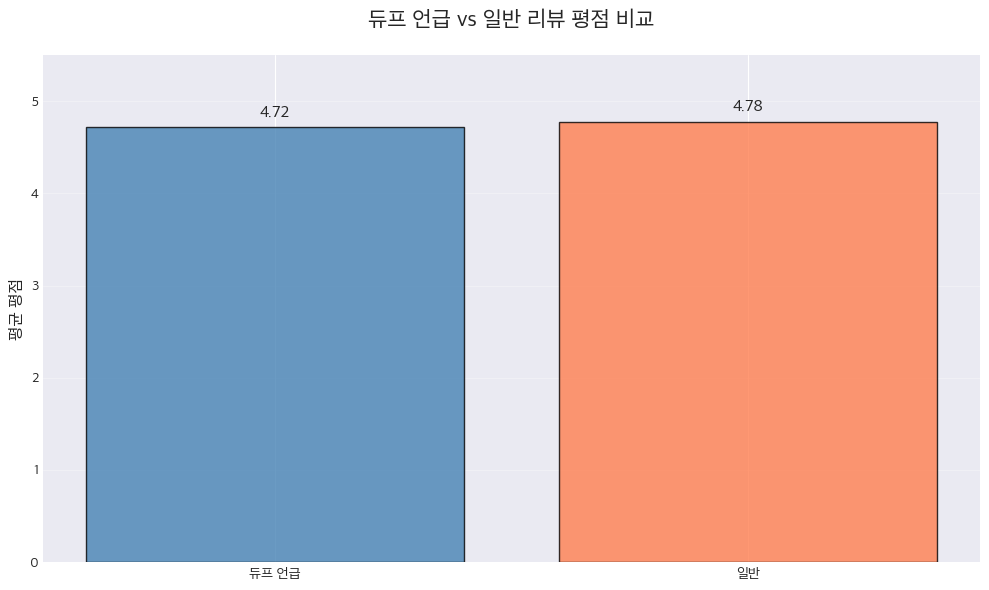

In [29]:
# 듀프 언급 vs 일반 리뷰 평점 비교
if len(df_dupe_mention) > 0:
    df_comparison = pd.DataFrame({
        '그룹': ['듀프 언급', '일반'],
        '평균 평점': [
            df_dupe_mention['rating'].mean(),
            df_merged[~df_merged.index.isin(df_dupe_mention.index)]['rating'].mean()
        ],
        '리뷰 수': [
            len(df_dupe_mention),
            len(df_merged) - len(df_dupe_mention)
        ]
    })
    
    print("[듀프 언급 vs 일반 리뷰 비교]")
    print(df_comparison)
    
    # 시각화
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(df_comparison['그룹'], df_comparison['평균 평점'], 
           color=['steelblue', 'coral'], edgecolor='black', alpha=0.8)
    ax.set_ylabel('평균 평점', fontsize=12)
    ax.set_title('듀프 언급 vs 일반 리뷰 평점 비교', fontsize=16, fontweight='bold', pad=20)
    ax.set_ylim(0, 5.5)
    ax.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(df_comparison['평균 평점']):
        ax.text(i, v + 0.1, f'{v:.2f}', ha='center', fontsize=12, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
else:
    print("듀프 언급이 없어 비교를 생략합니다.")

## 7. 브랜드 vs 제품력 분석

In [30]:
# 브랜드 유무별 제품 분류
products_with_brand = df_products[df_products['brand'].notna()]
products_without_brand = df_products[df_products['brand'].isna()]

print(f"[제품 브랜드 현황]")
print(f"브랜드 있음: {len(products_with_brand):,}개 ({len(products_with_brand)/len(df_products)*100:.1f}%)")
print(f"브랜드 없음: {len(products_without_brand):,}개 ({len(products_without_brand)/len(df_products)*100:.1f}%)")

[제품 브랜드 현황]
브랜드 있음: 961개 (100.0%)
브랜드 없음: 0개 (0.0%)


In [31]:
# 브랜드 키워드 vs 제품력 키워드 언급 비교
brand_keywords = ['브랜드', '명품', '유명']
quality_keywords = ['효과', '품질', '좋다', '만족']

df_merged['mentions_brand'] = df_merged['text'].apply(
    lambda x: any(kw in str(x) for kw in brand_keywords)
)
df_merged['mentions_quality'] = df_merged['text'].apply(
    lambda x: any(kw in str(x) for kw in quality_keywords)
)

print("[키워드 언급 통계]")
print(f"브랜드 키워드 언급: {df_merged['mentions_brand'].sum():,}개 ({df_merged['mentions_brand'].mean()*100:.1f}%)")
print(f"제품력 키워드 언급: {df_merged['mentions_quality'].sum():,}개 ({df_merged['mentions_quality'].mean()*100:.1f}%)")
print(f"\n제품력/브랜드 비율: {df_merged['mentions_quality'].sum() / max(df_merged['mentions_brand'].sum(), 1):.2f}")

[키워드 언급 통계]
브랜드 키워드 언급: 4,446개 (2.2%)
제품력 키워드 언급: 27,187개 (13.5%)

제품력/브랜드 비율: 6.11


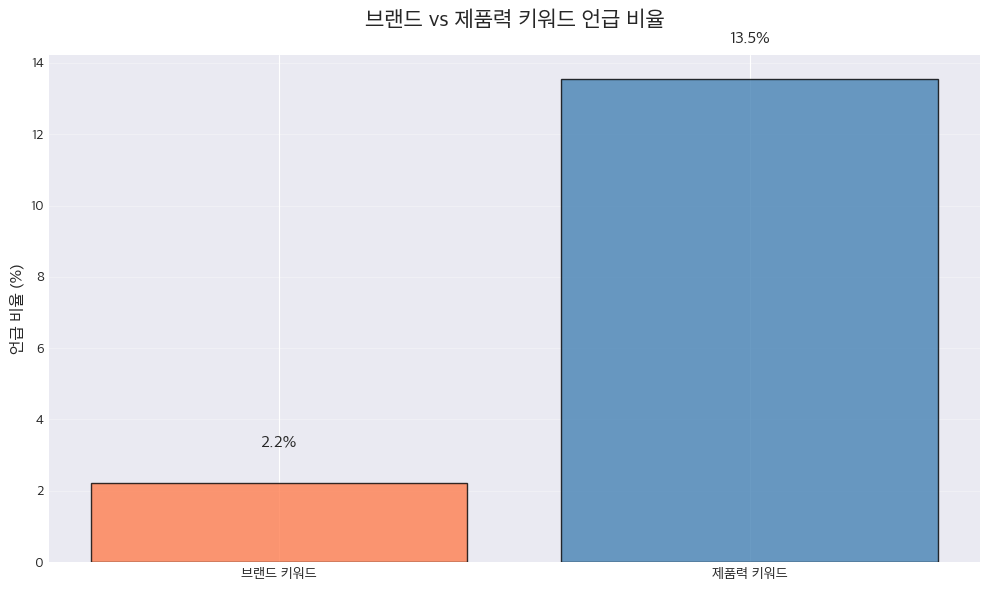

In [32]:
# 시각화: 브랜드 vs 제품력 언급 비율
fig, ax = plt.subplots(figsize=(10, 6))

categories = ['브랜드 키워드', '제품력 키워드']
values = [
    df_merged['mentions_brand'].mean() * 100,
    df_merged['mentions_quality'].mean() * 100
]

ax.bar(categories, values, color=['coral', 'steelblue'], edgecolor='black', alpha=0.8)
ax.set_ylabel('언급 비율 (%)', fontsize=12)
ax.set_title('브랜드 vs 제품력 키워드 언급 비율', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(values):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [33]:
# 브랜드별 평점 Top 10 (리뷰 수 10개 이상)
brand_stats = df_merged[df_merged['brand'].notna()].groupby('brand').agg({
    'rating': ['mean', 'count'],
    'product_code': 'nunique'
})
brand_stats.columns = ['평균평점', '리뷰수', '제품수']
brand_stats = brand_stats[brand_stats['리뷰수'] >= 10]
brand_stats = brand_stats.sort_values('평균평점', ascending=False)

print("[브랜드별 평균 평점 Top 10 (리뷰 10개 이상)]")
print(brand_stats.head(10))

[브랜드별 평균 평점 Top 10 (리뷰 10개 이상)]
               평균평점    리뷰수  제품수
brand                          
VT         4.888909  11198    3
마미케어       4.859813    107    1
제이엠솔루션     4.859649    114    2
이즈앤트리      4.854545     55    1
닥터오라클      4.826739    733    1
쉬크         4.825926    270    2
미모 바이 마몽드  4.817343   1084    1
마데카21      4.809898  12588    3
도루코        4.786424    604    6
본셉         4.781556  12145    5


## 8. 종합 분석: 저가 vs 듀프 시장

In [34]:
# 시장 특성 지표 계산
indicators = {
    '고가 브랜드 언급률': len(df_luxury_mention) / len(df_merged) * 100,
    '올리브영 언급률': len(df_oy_mention) / len(df_merged) * 100,
    '듀프 언급률': len(df_dupe_mention) / len(df_merged) * 100,
    '브랜드 키워드 언급률': df_merged['mentions_brand'].mean() * 100,
    '제품력 키워드 언급률': df_merged['mentions_quality'].mean() * 100,
    '브랜드 제품 비율': len(products_with_brand) / len(df_products) * 100
}

print("[다이소 뷰티 시장 특성 지표]")
for key, value in indicators.items():
    print(f"{key}: {value:.2f}%")

[다이소 뷰티 시장 특성 지표]
고가 브랜드 언급률: 0.02%
올리브영 언급률: 0.37%
듀프 언급률: 0.68%
브랜드 키워드 언급률: 2.21%
제품력 키워드 언급률: 13.54%
브랜드 제품 비율: 100.00%


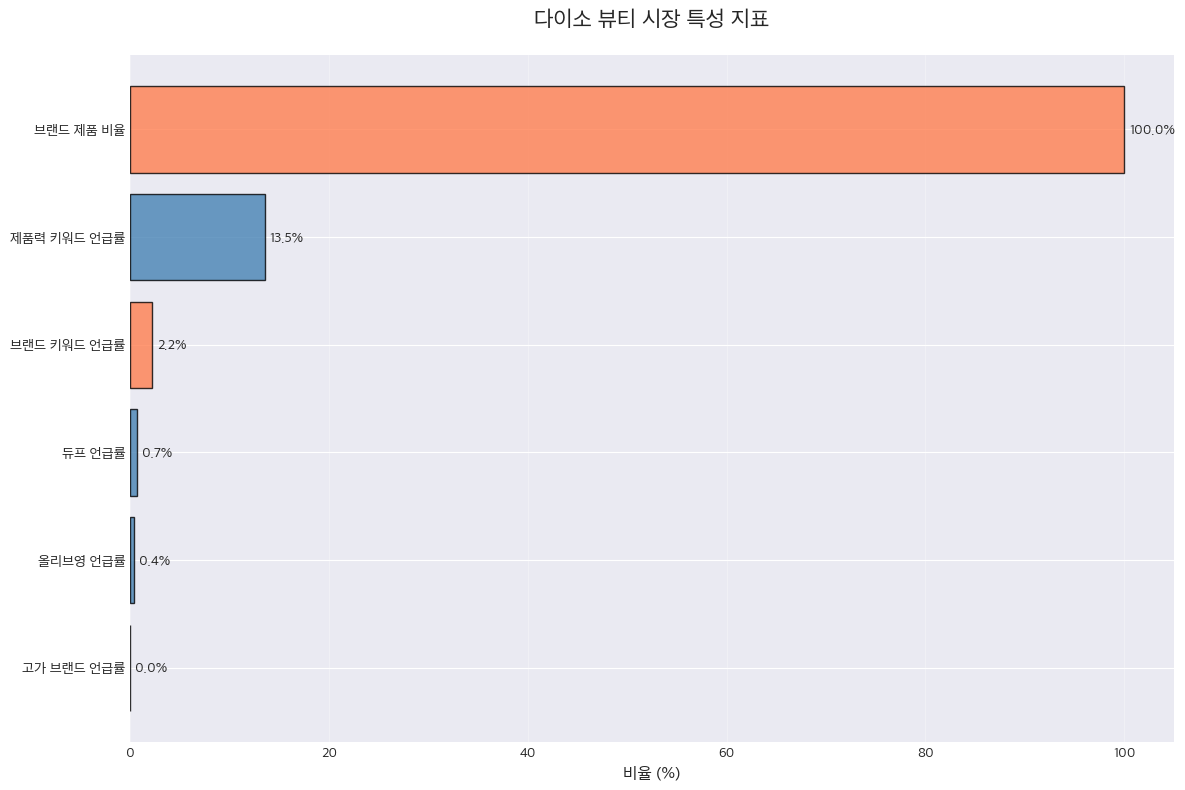

In [35]:
# 시각화: 시장 특성 지표
fig, ax = plt.subplots(figsize=(12, 8))

categories = list(indicators.keys())
values = list(indicators.values())

colors = ['coral' if '브랜드' in cat else 'steelblue' for cat in categories]

ax.barh(categories, values, color=colors, edgecolor='black', alpha=0.8)
ax.set_xlabel('비율 (%)', fontsize=12)
ax.set_title('다이소 뷰티 시장 특성 지표', fontsize=16, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 9. 인사이트 및 결론

In [36]:
# 핵심 인사이트 정리
insights = f"""
[RQ2 분석 결과: 다이소 뷰티 시장 특성]

1. 고가 브랜드 대체재(듀프) 인식
   - 고가 브랜드 언급률: {indicators['고가 브랜드 언급률']:.2f}%
   - 듀프 키워드 언급률: {indicators['듀프 언급률']:.2f}%
   - 듀프 언급 시 평균 평점: {df_dupe_mention['rating'].mean():.2f}점 (일반: {df_merged[~df_merged.index.isin(df_dupe_mention.index)]['rating'].mean():.2f}점)

2. 올리브영과의 관계
   - 올리브영 언급률: {indicators['올리브영 언급률']:.2f}%

3. 브랜드 vs 제품력 중요도
   - 브랜드 키워드 언급: {indicators['브랜드 키워드 언급률']:.2f}%
   - 제품력 키워드 언급: {indicators['제품력 키워드 언급률']:.2f}%
   - 제품력/브랜드 비율: {df_merged['mentions_quality'].sum() / max(df_merged['mentions_brand'].sum(), 1):.2f}

5. 시장 특성 결론
   - 소비자는 브랜드보다 {'제품력' if indicators['제품력 키워드 언급률'] > indicators['브랜드 키워드 언급률'] * 2 else '브랜드와 제품력 모두'}를 중시

6. 선행 연구와의 비교
   - 논문 1과 일치: 브랜드 이미지는 만족도에 유의미한 영향 없음
   - 논문 4와 일치: 소비자는 고가 제품의 대체품(DUPES)으로 인식
   - 다이소는 "브랜드 충성" 시장이 아니라 "제품 단위 충성" 시장

7. 중소 브랜드 입점 가능성
   - 유명 브랜드가 아니어도 품질만 좋으면 다이소에서 성공 가능
   - 중소 뷰티 브랜드에게 매력적인 유통 채널

8. 비즈니스 시사점
   - 듀프 마케팅 강화: 고가 브랜드 대체재로 포지셔닝
   - 제품력 중심 홍보: 브랜드보다 효과와 품질 강조
   - 중소 브랜드 파트너십: 품질 좋은 무명 브랜드 적극 발굴
"""

print(insights)


[RQ2 분석 결과: 다이소 뷰티 시장 특성]

1. 고가 브랜드 대체재(듀프) 인식
   - 고가 브랜드 언급률: 0.02%
   - 듀프 키워드 언급률: 0.68%
   - 듀프 언급 시 평균 평점: 4.72점 (일반: 4.78점)

2. 올리브영과의 관계
   - 올리브영 언급률: 0.37%

3. 브랜드 vs 제품력 중요도
   - 브랜드 키워드 언급: 2.21%
   - 제품력 키워드 언급: 13.54%
   - 제품력/브랜드 비율: 6.11

5. 시장 특성 결론
   - 소비자는 브랜드보다 제품력를 중시

6. 선행 연구와의 비교
   - 논문 1과 일치: 브랜드 이미지는 만족도에 유의미한 영향 없음
   - 논문 4와 일치: 소비자는 고가 제품의 대체품(DUPES)으로 인식
   - 다이소는 "브랜드 충성" 시장이 아니라 "제품 단위 충성" 시장

7. 중소 브랜드 입점 가능성
   - 유명 브랜드가 아니어도 품질만 좋으면 다이소에서 성공 가능
   - 중소 뷰티 브랜드에게 매력적인 유통 채널

8. 비즈니스 시사점
   - 듀프 마케팅 강화: 고가 브랜드 대체재로 포지셔닝
   - 제품력 중심 홍보: 브랜드보다 효과와 품질 강조
   - 중소 브랜드 파트너십: 품질 좋은 무명 브랜드 적극 발굴



In [37]:
# 결과 저장
output_path = Path('./results_RQ2')
output_path.mkdir(exist_ok=True)

# 주요 결과 데이터프레임 저장
if len(df_brand_freq) > 0:
    df_brand_freq.to_csv(output_path / 'luxury_brand_mentions.csv', index=False, encoding='utf-8-sig')
if len(df_dupe_mention) > 0:
    df_dupe_mention.to_csv(output_path / 'dupe_reviews.csv', index=False, encoding='utf-8-sig')
brand_stats.to_csv(output_path / 'brand_ratings.csv', encoding='utf-8-sig')

# 시장 지표 저장
pd.DataFrame([indicators]).to_csv(output_path / 'market_indicators.csv', index=False, encoding='utf-8-sig')

# 인사이트 텍스트 저장
with open(output_path / 'insights_RQ2.txt', 'w', encoding='utf-8') as f:
    f.write(insights)

print(f"[완료] 결과 저장: {output_path}")

[완료] 결과 저장: results_RQ2
